In [1]:
import tensorflow
import os
from os import listdir
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
train_dir = 'split/train'
train_CORROSION_dir = 'split/train/CORROSION/'
train_NOCORROSION_dir = 'split/train/NOCORROSION/'

validation_dir = 'split/validation'
validation_CORROSION_dir = 'split/validation/CORROSION/'
validation_NOCORROSION_dir = 'split/validation/NOCORROSION/'

test_dir = 'split/test'
test_CORROSION_dir = 'split/test/CORROSION/'
test_NOCORROSION_dir = 'split/test/NOCORROSION/'

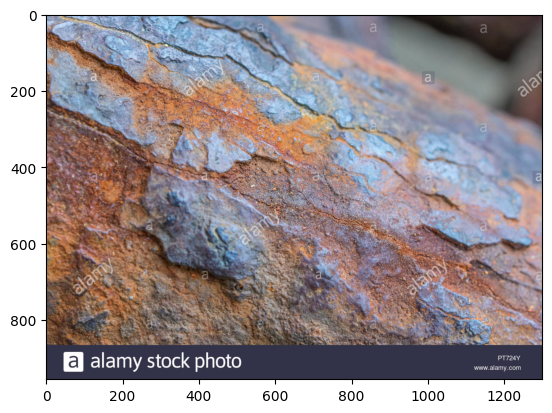

In [3]:
from PIL import Image

image = Image.open('data/CORROSION/thick-rust-encrustation-on-very-heavy-duty-mooring-chain-abstract-rusty-metal-texture-metaphor-for-corrosion-weak-link-weak-point-weakness-PT724Y.jpg')
plt.imshow(image)
plt.show()

In [4]:
CORROSION_dir = 'data/CORROSION'
NOCORROSION_dir = 'data/NOCORROSION'

In [5]:
corrosion_list = []
nocorrosion_list = []
for images in os.listdir(CORROSION_dir):
    try:
        image_path = CORROSION_dir+'/'+images
        image = Image.open(image_path)
        corrosion_list.append(image_path)
    except :
        pass
    
for images in os.listdir(NOCORROSION_dir):
    try:
        image_path = NOCORROSION_dir+'/'+images
        image = Image.open(image_path)
        nocorrosion_list.append(image_path)
    except :
        pass

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [101]:
import cv2
import numpy as np
img = cv2.resize(cv2.imread('data/nail.jpg'),(640,640))
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# Range for lower red
lower_red1 = np.array([0,70,50])
upper_red1 = np.array([20,255,150])
mask0 = cv2.inRange(hsv, lower_red1, upper_red1)
	
# range for upper red
lower_red2 = np.array([220,70,70])
upper_red2 = np.array([255,255,150])
mask1 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask0+mask1

output = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow('img',cv2.resize(output, (640,640)))
cv2.waitKey(0)
cv2.destroyWindow('img')

In [ ]:
img = cv2.resize(cv2.imread(corrosion_list[1]),(640,640))
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyWindow('img')

In [64]:
threshold_list_int = range(int(0.005*1000),int(0.105*1000),int(0.005*1000))
threshold_list = []
for num in threshold_list_int:
    threshold_list.append(num/1000)

In [65]:
eva_list = []
for threshold in threshold_list:
    y_true = []
    y_pred = []
    for image in corrosion_list:
        y_true.append(1)
        img = cv2.resize(cv2.imread(image),(640,640))
        hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        # Range for lower red
        lower_red1 = np.array([0,70,50])
        upper_red1 = np.array([20,255,150])
        mask0 = cv2.inRange(hsv, lower_red1, upper_red1)
            
        # range for upper red
        lower_red2 = np.array([220,70,70])
        upper_red2 = np.array([255,255,150])
        mask1 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask = mask0+mask1
        corrosion_pixel = np.count_nonzero(mask)
        if corrosion_pixel > 640*640*threshold:
            y_pred.append(1)
        else :
            y_pred.append(0)

    for image in nocorrosion_list:
        y_true.append(0)
        img = cv2.resize(cv2.imread(image),(640,640))
        hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        # Range for lower red
        lower_red1 = np.array([0,70,50])
        upper_red1 = np.array([20,255,150])
        mask0 = cv2.inRange(hsv, lower_red1, upper_red1)
            
        # range for upper red
        lower_red2 = np.array([220,70,70])
        upper_red2 = np.array([255,255,150])
        mask1 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask = mask0+mask1
        corrosion_pixel = np.count_nonzero(mask)
        if corrosion_pixel > 640*640*threshold:
            y_pred.append(1)
        else :
            y_pred.append(0)

    cm = confusion_matrix(y_true, y_pred)

    TP, FN, FP, TN = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    f1 = 2*precision*recall / (precision + recall)
    eva_list.append([threshold,TP,FN,FP,TN,f1])


In [71]:
all_len = len(corrosion_list) + len(nocorrosion_list)
TP_list = []
FP_list = []
f1_list = []
for eva in eva_list:
    TP_list.append(eva[1]/all_len)
    FP_list.append(eva[3]/all_len)
    f1_list.append(eva[5])

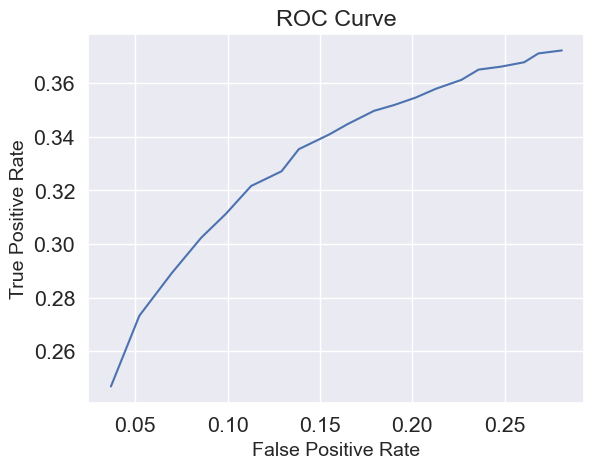

In [73]:
plt.title('ROC Curve')
plt.plot(FP_list,TP_list)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.show()

In [66]:
eva_list

[[0.005, 449, 380, 67, 923, 0.6676579925650558],
 [0.01, 497, 332, 95, 895, 0.6995073891625615],
 [0.015, 526, 303, 127, 863, 0.7098515519568152],
 [0.02, 550, 279, 156, 834, 0.7166123778501629],
 [0.025, 566, 263, 180, 810, 0.7187301587301588],
 [0.03, 585, 244, 205, 785, 0.7226683137739345],
 [0.035, 595, 234, 235, 755, 0.7172995780590717],
 [0.04, 610, 219, 252, 738, 0.7214665878178593],
 [0.045, 620, 209, 282, 708, 0.7163489312536107],
 [0.05, 627, 202, 300, 690, 0.714123006833713],
 [0.055, 636, 193, 326, 664, 0.710217755443886],
 [0.06, 640, 189, 346, 644, 0.7052341597796143],
 [0.065, 645, 184, 367, 623, 0.7007061379684953],
 [0.07, 651, 178, 387, 603, 0.6973754686663097],
 [0.075, 657, 172, 412, 578, 0.6923076923076923],
 [0.08, 664, 165, 429, 561, 0.6909469302809572],
 [0.085, 666, 163, 451, 539, 0.68448098663926],
 [0.09, 669, 160, 474, 516, 0.678498985801217],
 [0.095, 675, 154, 488, 502, 0.677710843373494],
 [0.1, 677, 152, 511, 479, 0.6712940009915715]]

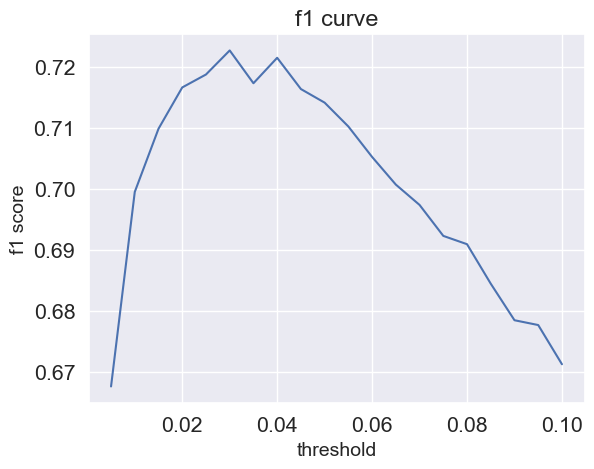

In [76]:
plt.title('f1 curve')
plt.plot(threshold_list,f1_list,)
plt.xlabel('threshold', size=14)
plt.ylabel('f1 score', size=14)
plt.show()

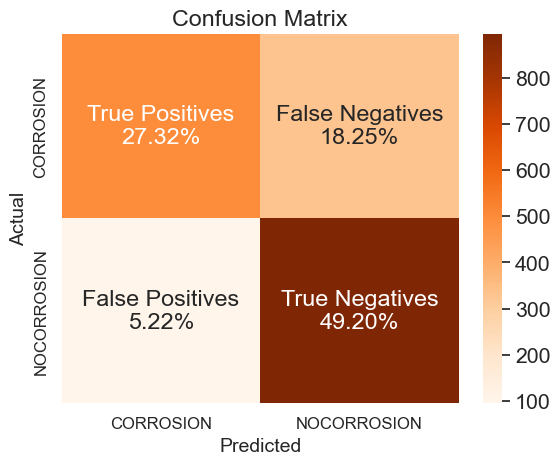

[Summary Statistics]
Accuracy = 76.53% | Precision = 83.95% | Recall = 59.95% | Specificity = 90.40% | F1 Score = 69.95%


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
  
names = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['CORROSION', 'NOCORROSION']

# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 
plt.show()

TP, FN, FP, TN = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

In [106]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

while True:
    ret1, img= cap.read()
    ret2, img= cap.read()
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    # Range for lower red
    lower_red1 = np.array([0,70,50])
    upper_red1 = np.array([20,255,150])
    mask0 = cv2.inRange(hsv, lower_red1, upper_red1)
    
    # range for upper red
    lower_red2 = np.array([220,70,50])
    upper_red2 = np.array([255,255,150])
    mask1 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = mask0+mask1
    output = cv2.bitwise_and(img, img, mask=mask)
    numpy_horizontal = np.hstack((img, output))
    corrosion_pixel = np.count_nonzero(mask)
    if corrosion_pixel > 640*640*0.0025:
        corrosion = 1
    else :
        corrosion = 0 
    final = cv2.putText(numpy_horizontal, str(corrosion), (50,50), cv2.FONT_HERSHEY_SIMPLEX , 2, (255, 0, 0) , 2, cv2.LINE_AA) 
    
    cv2.imshow('Webcam', final)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [111]:
from roboflow import Roboflow
rf = Roboflow(api_key="REbzZALb0aEjUcufFvsw")
project = rf.workspace("natthaphon-sangmuang-mrsvt").project("corrosion_detection-7njz6")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to corrosion_detection-1 in yolov8:: 100%|██████████| 108/108 [00:00<00:00, 1367.21it/s]
